In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
company_data = pd.read_csv('C:/Users/ASUS/Company.csv')
company_data.head()


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
#Complete Company dataset :

from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
company_data["ShelveLoc"]= label_encoder.fit_transform(company_data["ShelveLoc"])
company_data["Urban"]= label_encoder.fit_transform(company_data["Urban"])
company_data["US"]= label_encoder.fit_transform(company_data["US"])


In [4]:
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [5]:
# Creating Caterogical data on Sales Variable :

print("Length of Sales Variable : ",len(company_data["Sales"]))
print("Mean of Sales Variable : ",company_data["Sales"].mean())
company_data["Sales"].sort_values()


Length of Sales Variable :  400
Mean of Sales Variable :  7.496325


174     0.00
106     0.16
165     0.37
143     0.53
57      0.91
       ...  
18     13.91
367    14.37
25     14.90
316    15.63
376    16.27
Name: Sales, Length: 400, dtype: float64

In [6]:
company_data["highsales"] = np.where((company_data["Sales"] < 9),"Low","High")
company_data["highsales"]= label_encoder.fit_transform(company_data["highsales"])
company_data_new = company_data.iloc[:,1:]
company_data_new.head()


,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,highsales
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,1


In [7]:
# Decision Tree Classifier :
from sklearn.tree import DecisionTreeClassifier


In [8]:
array = company_data_new.values
X = array[:,:-1]
y = array[:,-1]


In [9]:
X

array([[138,  73,  11, ...,  17,   1,   1],
       [111,  48,  16, ...,  10,   1,   1],
       [113,  35,  10, ...,  12,   1,   1],
       ...,
       [162,  26,  12, ...,  18,   1,   1],
       [100,  79,   7, ...,  12,   1,   1],
       [134,  37,   0, ...,  16,   1,   1]], dtype=int64)

In [10]:
y

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,

In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30)


In [12]:
model = DecisionTreeClassifier(criterion = "entropy", max_depth = 3)
model.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [13]:
# Predicting :
predict = model.predict(X_test)
pd.Series(predict).value_counts()


1    108
0     12
dtype: int64

In [14]:
pd.crosstab(y_test,predict)

col_0,0,1
row_0,,
0,11,25
1,1,83


In [15]:
# Accuracy :
np.mean(predict == y_test)


0.7833333333333333

In [16]:
# Feature Importance :
importance = model.feature_importances_
importance


array([0.19462033, 0.        , 0.27255332, 0.        , 0.39633032,
       0.07515125, 0.06134478, 0.        , 0.        , 0.        ])

<AxesSubplot:>

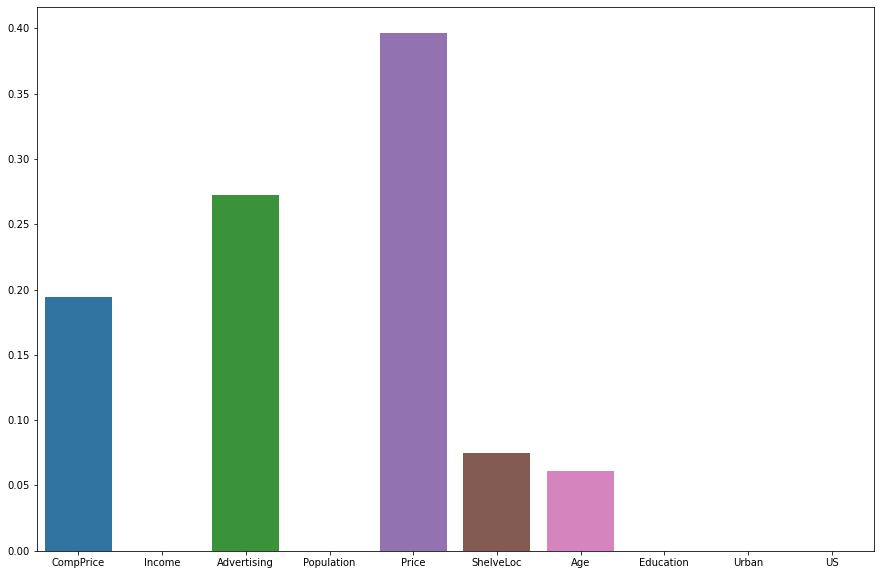

In [17]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.barplot(x=["CompPrice","Income","Advertising","Population","Price","ShelveLoc","Age","Education","Urban","US"],y=model.feature_importances_)
